In [ ]:
!pip install mlphys

In [2]:
from mlphys.lgoam.utils.Imaging import Save
from mlphys.lgoam.utils.Noise import Noise_Dist
from mlphys.lgoam.source.OAM_Intensity_Phase import LG_Lights_Tensorflow
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

The code is written on Tensorflow 2.4, and can be accelerated with GPU hardware.

Currently it only supports for p = 0 and p = 1 modes on GPU.


Only Two lines, and that's all.


```
1. intensity_list,phase_list = lg.Superposition_Batch(p_l_array = p_and_l_set_np,w=0.00015,
                                                 grating_period=0,save_image=False,numpy_array=False)

2. Noise_Dist().Guassian_Noise_Batch(intensity_sup,multiple=200,factor=5e5)
```

In [3]:
lg = LG_Lights_Tensorflow(xpixel=256,ypixel=256,dT=8e-6,verbose=True)


## 2. Superposition mode
### Example: $\psi = \alpha_1 |LG_{0,1}^{\ell_1}\rangle + \alpha_2|LG_{0,1}^{\ell_2}\rangle+ \alpha_2|LG_{0,1}^{\ell_2}\rangle + ... ...$

### 2.1 Superposition between $\pm\ell = \pm 10$ for $\alpha_1 = 1$,  $\alpha_2 = 1$ and $p=0$


first column: p and second column: l [[  0.  10.]
 [  0. -10.]]
alpha_list or array [1, 1]
|Running on CPU .. .. ..
|list of alpha is found .. ..
|Found P = 0, ... ...
|Found P = 0, ... ...

Outputs are tensors as default.

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(256, 256), dtype=float32)


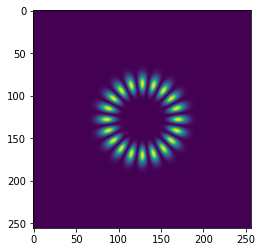

In [4]:
p_set = np.zeros(2)
l_set = np.array([10,-10])
p_and_l_set = np.stack([p_set,l_set],axis=1)
alpha_list = [1,1]
print ('first column: p and second column: l', p_and_l_set)
print ('alpha_list or array', alpha_list)


intensity_sup, phase_sup = lg.Superposition(p_l_array = p_and_l_set,alpha_array=alpha_list,\
                                         w=0.00015,grating_period = 0,save_image=False)
print ('')
print('Outputs are tensors as default.')
print ('')
print (intensity_sup)
plt.imshow(intensity_sup)
plt.show()

### 2.2 Superposition between $\ell$ and $-\ell$ for $\alpha_1 = 1$,  $\alpha_2 = 1$ and $p=1$

|Running on CPU .. .. ..
|list of alpha is found .. ..
|Found P = 1, ... ...
|Found P = 1, ... ...


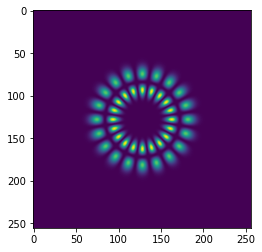

In [5]:
p_set = np.ones(2)
l_set = np.array([10,-10])
p_and_l_set = np.stack([p_set,l_set],axis=1)
alpha_list = [1,1]

intensity_sup, phase_sup = lg.Superposition(p_l_array = p_and_l_set,alpha_array=alpha_list,\
                                         w=0.00015,grating_period = 0,save_image=False)

plt.imshow(intensity_sup)
plt.show()

### 2.2 Superposition between $\ell_1 = 3$,  $\ell_2 = 11$,  $p_1 = 0$, $p_2 = 0$, for $\alpha_1 = 1$,  $\alpha_2 = 1$

|Running on CPU .. .. ..
|list of alpha is found .. ..
|Found P = 0, ... ...
|Found P = 0, ... ...


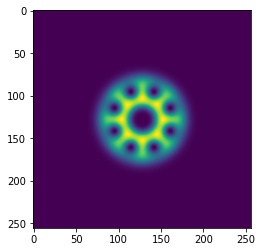

In [6]:
p_set = np.zeros(2)
l_set = np.array([3,11])
p_and_l_set = np.stack([p_set,l_set],axis=1)
alpha_list = [1,1]
intensity_sup, phase_sup = lg.Superposition(p_l_array = p_and_l_set,alpha_array=alpha_list,\
                                         w=0.00015,grating_period = 0,save_image=False)

plt.imshow(intensity_sup)
plt.show()

### 2.3 Superposition between $\ell_1 = 2$,  $\ell_2 = 11$,  $\ell_3 = 20$,  $p_1 = 0$,  $p_2 = 0$, $p_3 = 0$  for $\alpha_1 = 1$,  $\alpha_2 = 1$,  $\alpha_3 = 1$


|Running on CPU .. .. ..
|list of alpha is found .. ..
|Found P = 0, ... ...
|Found P = 0, ... ...
|Found P = 0, ... ...


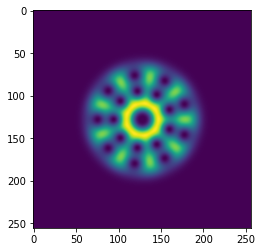

In [7]:
p_set = np.zeros(3)
l_set = np.array([2,11,20])
p_and_l_set = np.stack([p_set,l_set],axis=1)
alpha_list = [1,1,1]
intensity_sup, phase_sup = lg.Superposition(p_l_array = p_and_l_set,alpha_array=alpha_list,\
                                         w=0.00015,grating_period = 0,save_image=False)

plt.imshow(intensity_sup)
plt.show()

### 2.3 Superposition between $\ell_1 = 1$,  $\ell_2 = 5$, $\ell_3 = 30$, $\ell_4 = -30$,  $p_i = 0$ for $\alpha_i = 1$


|Running on CPU .. .. ..
|list of alpha is found .. ..
|Found P = 0, ... ...
|Found P = 0, ... ...
|Found P = 0, ... ...
|Found P = 0, ... ...


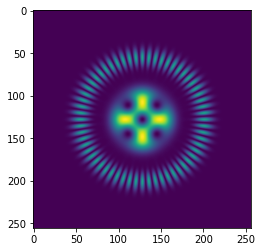

In [8]:
p_set = np.zeros(4)
l_set = np.array([1,5,30,-30])
p_and_l_set = np.stack([p_set,l_set],axis=1)
alpha_list = [1,1,1,1]
intensity_sup, phase_sup = lg.Superposition(p_l_array = p_and_l_set,alpha_array=alpha_list,\
                                         w=0.00015,grating_period = 0,save_image=False)

plt.imshow(intensity_sup)
plt.show()

### 3. A Batch of Superposition modes
#### It requires p_l array and alpha_array should in a rank 3 tensor or numpy array with ndim == 3.
#### p_l_array dim = (batch, size of oam to be superposed, 2)
#### alpha_array = (batch, size of oam to be superposed, 1)
$\color{red}{\text{Superposition of 3 OAM modes at a time is described below}}$

In [9]:
p_set = np.random.randint(0,2,36) 
print ('p_values: ', p_set)

p_values:  [0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1]


In [10]:
l_set = np.random.randint(-10,10,36)
print ('l_values: ', l_set)

l_values:  [ -1  -2   4   5   4   4  -4   2  -2   4   6  -9  -3  -2  -7   1  -9  -5
  -4   6  -6   1   6   1   0  -6  -6   8  -4  -5   6   1  -7  -5 -10   9]


In [11]:
p_and_l_set = np.stack([p_set,l_set],axis=1)
#reshaping it to 3dim tensor


# (batch, no. of oam modes to be superimposed, 2)
# As we are going to superimpose 3 oam modes at a time, we need to reshape p_l array into following

p_and_l_set = p_and_l_set.reshape(-1,3,2) #(batch, no. of oam modes to be superimposed, 2)

print ('p_l_values: ', p_and_l_set)

p_l_values:  [[[  0  -1]
  [  1  -2]
  [  1   4]]

 [[  0   5]
  [  0   4]
  [  0   4]]

 [[  0  -4]
  [  0   2]
  [  0  -2]]

 [[  0   4]
  [  0   6]
  [  1  -9]]

 [[  1  -3]
  [  0  -2]
  [  1  -7]]

 [[  0   1]
  [  1  -9]
  [  1  -5]]

 [[  1  -4]
  [  1   6]
  [  0  -6]]

 [[  1   1]
  [  1   6]
  [  1   1]]

 [[  1   0]
  [  0  -6]
  [  1  -6]]

 [[  0   8]
  [  0  -4]
  [  1  -5]]

 [[  1   6]
  [  0   1]
  [  1  -7]]

 [[  1  -5]
  [  1 -10]
  [  1   9]]]


In [12]:
alpha_array = np.ones([len(p_and_l_set),3,1])
print ('alpha_values: ', alpha_array)

alpha_values:  [[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]]


### 3. 1 The first mode will be the superposition between $\psi$ =  $|LG_{0}^{9}\rangle$ + $|LG_{1}^{-4}\rangle$ + $|LG_{0}^{-3}\rangle$ as desrcrbed by p_and_l_set and alpha_array in the preceding cells.  And so on .. ..

Total size of SUP-OAM modes:  12


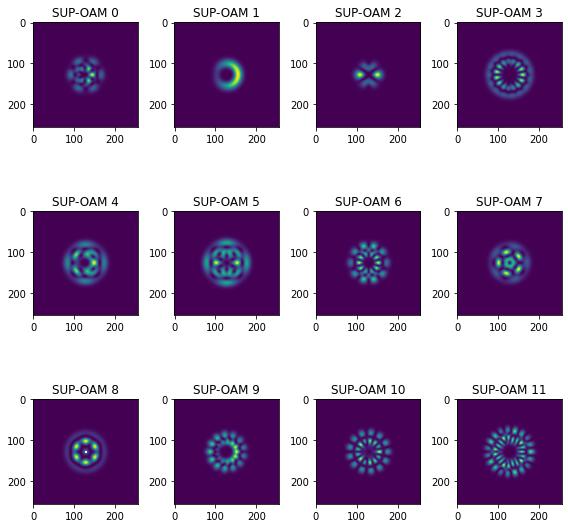

In [13]:
lg.verbose=False
intensity_list, phase_list = lg.Superposition_Batch(p_l_array = p_and_l_set,alpha_array=alpha_array,\
                                                 w=0.00015,grating_period = 0,save_image=False)

print ('Total size of SUP-OAM modes: ',len(intensity_list))

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(intensity_list[i])
    axi.set_title(f'SUP-OAM {i}')
plt.tight_layout()
plt.show()

#### 3.1.1 Corresponding Phases at grating period = 0

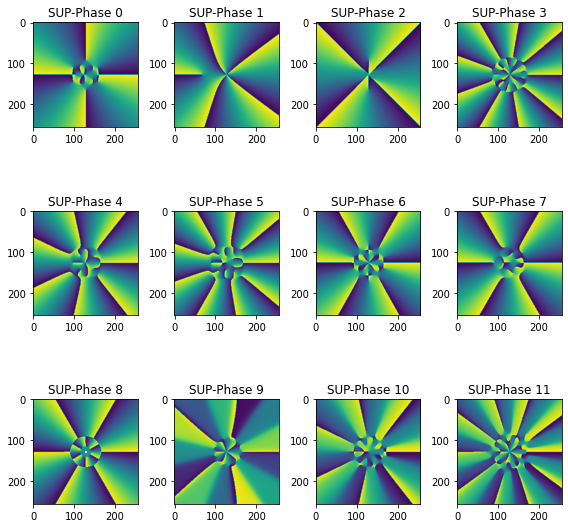

In [14]:
lg.verbose=False
intensity_list, phase_list = lg.Superposition_Batch(p_l_array = p_and_l_set,alpha_array=alpha_array,\
                                                 w=0.00015,grating_period = 0,save_image=False)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(phase_list[i])
    axi.set_title(f'SUP-Phase {i}')
plt.tight_layout()
plt.show()

#### 3.1.1 Corresponding Phases at grating period = 20

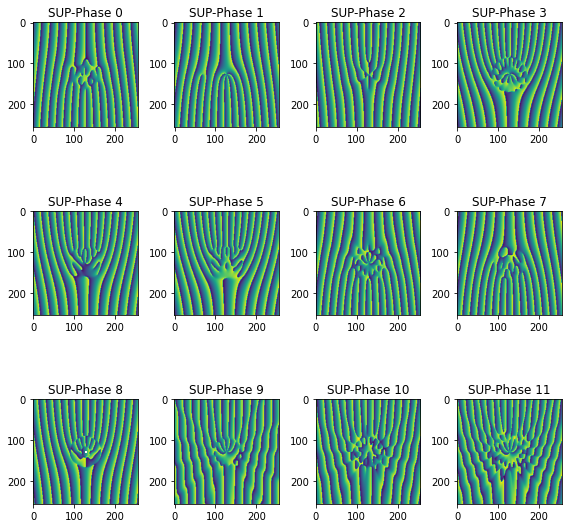

In [15]:
lg.verbose=False
intensity_list, phase_list = lg.Superposition_Batch(p_l_array = p_and_l_set,alpha_array=alpha_array,\
                                                 w=0.00015,grating_period = 20,save_image=False)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(phase_list[i])
    axi.set_title(f'SUP-Phase {i}')
plt.tight_layout()
plt.show()

### 3. 2 Superposition modes with different mixtures, $\alpha_i$'s at $p = 0$, and $\ell = 3, 11$

In [16]:
size_of_oam_to_be_superposed = 2 # l = 3 and l = 11
batch_size = 16 # 16 different mixtures of alpha are desired

p_set = np.zeros(batch_size*size_of_oam_to_be_superposed)
l_values = [3,11]
l_set = np.tile(l_values,batch_size)

assert len(p_set) == len(l_set)
p_and_l_set = np.stack([p_set,l_set],axis=1).reshape(batch_size,size_of_oam_to_be_superposed,2)

print (p_and_l_set)

[[[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]

 [[ 0.  3.]
  [ 0. 11.]]]


In [17]:
alpha_1 = np.random.uniform(0,1,int(batch_size*size_of_oam_to_be_superposed/2))
alpha_2 = 1 - alpha_1
alpha_array = np.stack([alpha_1,alpha_2],axis=1).reshape(batch_size,size_of_oam_to_be_superposed,1)

print (alpha_array)

[[[0.8792909 ]
  [0.1207091 ]]

 [[0.32527469]
  [0.67472531]]

 [[0.40471595]
  [0.59528405]]

 [[0.25564495]
  [0.74435505]]

 [[0.39272679]
  [0.60727321]]

 [[0.47468059]
  [0.52531941]]

 [[0.04739564]
  [0.95260436]]

 [[0.76958181]
  [0.23041819]]

 [[0.62972481]
  [0.37027519]]

 [[0.14610195]
  [0.85389805]]

 [[0.61679498]
  [0.38320502]]

 [[0.00837529]
  [0.99162471]]

 [[0.071224  ]
  [0.928776  ]]

 [[0.05137521]
  [0.94862479]]

 [[0.71963665]
  [0.28036335]]

 [[0.98562478]
  [0.01437522]]]


Total size of SUP-OAM modes:  16


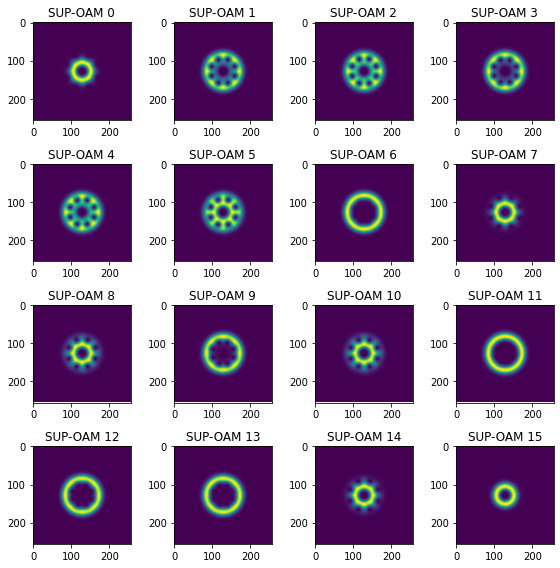

In [18]:
intensity_list, phase_list = lg.Superposition_Batch(p_l_array = p_and_l_set,alpha_array=alpha_array,\
                                                 w=0.00015,grating_period = 0,save_image=False)

print ('Total size of SUP-OAM modes: ',len(intensity_list))

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(intensity_list[i])
    axi.set_title(f'SUP-OAM {i}')
plt.tight_layout()
plt.show()

#### 3.2.1 Corresponding Phases at grating period = 0

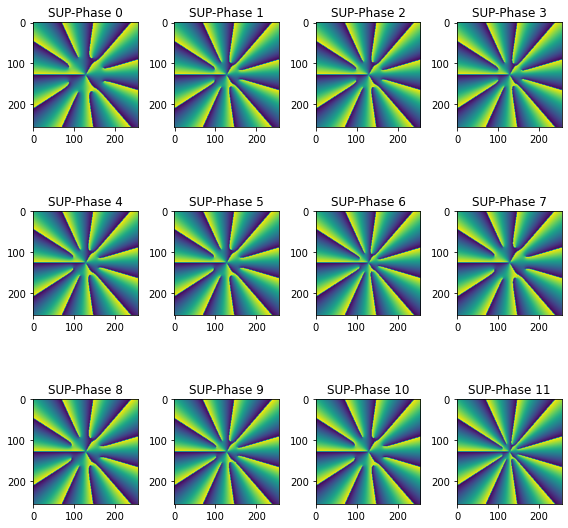

In [19]:
intensity_list, phase_list = lg.Superposition_Batch(p_l_array = p_and_l_set,alpha_array=alpha_array,\
                                                 w=0.00015,grating_period = 0,save_image=False)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(phase_list[i])
    axi.set_title(f'SUP-Phase {i}')
plt.tight_layout()
plt.show()

#### 3.2.1 Corresponding Phases at grating period = 20

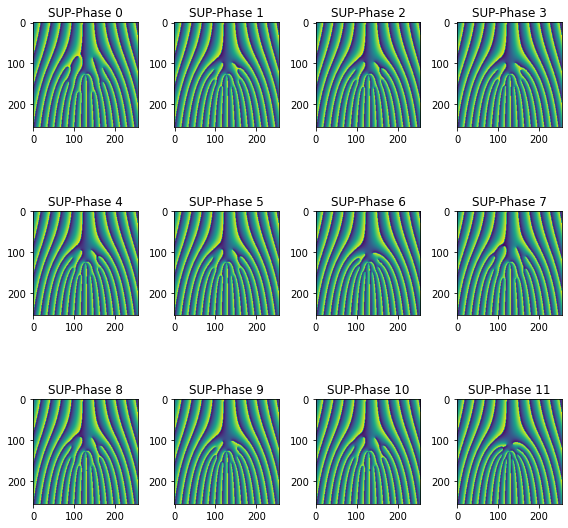

In [20]:
lg.verbose=False
intensity_list, phase_list = lg.Superposition_Batch(p_l_array = p_and_l_set,alpha_array=alpha_array,\
                                                 w=0.00015,grating_period = 20,save_image=False)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(8,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(phase_list[i])
    axi.set_title(f'SUP-Phase {i}')
plt.tight_layout()
plt.show()

### 3.3 Modes with Noise (eg. different mixtures of OAM, as described in preceding cell, with gaussian noise )


#### 3.3.1 200 noisy images per each 16 superpostion OAM are generated in ~ 0.05 secs.


In [21]:
import time
time1 = time.time()
intensity_with_gaussian = Noise_Dist().Guassian_Noise_Batch(intensity_list,multiple=200,factor=5e5)
time2 = time.time()
print ('|Computation Time: ', time2-time1)
print (tf.shape(intensity_with_gaussian))

|Computation Time:  9.105682134628296
tf.Tensor([ 16 200 256 256], shape=(4,), dtype=int32)


#### 3.3.2 plotting first 5 noisy images out of the total 200 per each 5 (out of 16) suposition modes. 


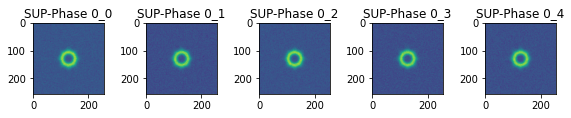

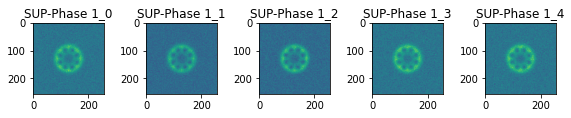

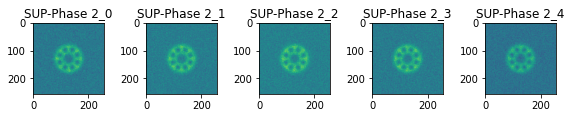

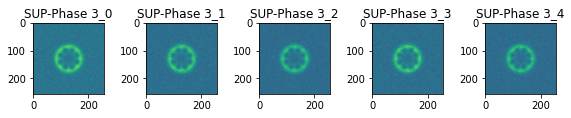

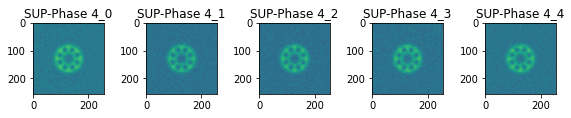

In [22]:
for j in range(5):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(8,8))
    for i, axi in enumerate(ax.flat):
        axi.imshow(intensity_with_gaussian[j][i])
        axi.set_title(f'SUP-Phase {j}_{i}')
    plt.tight_layout()
    plt.show()

### 3.3 Saving Tensors as Images


#### 3.3.1 Let's say we want to save the above 200 images per each 16 OAM modes, then

In [23]:
time1 = time.time()
Save().Save_Tensor_Image(intensity_with_gaussian)
time2 = time.time()
print ('|Computation Time for saving the images: ', time2-time1)

|Rank 4 tensor is found. 16 folders are created.
|Computation Time for saving the images:  34.28411245346069


### 3.4  As previously described, the outputs are tensors as default.
#### In order to have the outputs in numpy array, turn on the arg 'numpy_array True'

In [24]:
lg.verbose = False
intensity_list_tensors,phase_list_tensors = lg.Superposition_Batch(p_l_array = p_and_l_set,alpha_array=alpha_array,\
                                                 w=0.00015,grating_period = 0,save_image=False,numpy_array=False)

intensity_list_numpy,phase_list_numpy = lg.Superposition_Batch(p_l_array = p_and_l_set,alpha_array=alpha_array,\
                                                 w=0.00015,grating_period = 0,save_image=False,numpy_array=True)


print (type(intensity_list_tensors))
print (type(intensity_list_numpy))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>
